**Homework1 brief**

1. Write a Python code implementing a unit perceptron from scratch.
*   Keep the number of inputs variable
*   Train the perceptron to a dataset requiring binary classification.
*   Use the Unified Learning Rule for training.
*   Explore the use of Stochastic Gradient Descent to train your network.


In [1]:
# Importing Required Libraries

import math
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('train_x.csv').to_numpy()
y_train = pd.read_csv('train_y.csv').to_numpy()
X_test = pd.read_csv('test_x.csv').to_numpy()
y_test = pd.read_csv('test_y.csv').to_numpy()

X_train = X_train[:, 1:]
y_train = y_train[:, 1:]
X_test = X_test[:, 1:]
y_test = y_test[:, 1:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 15)
(150, 1)
(50, 15)
(50, 1)


m_train / m_test = 150 : 50, i.e. 75 : 25

In [3]:
def sigmoid(n):
    return 1/(1+(np.exp(-n)))

In [4]:
#Function will initialize W and b vectors as a zero vectors of required dimensions.
def initialize_zeros(X):
    num_cols = X.shape[1]
    num_data = X.shape[0]

    b = 1
    W = np.zeros([num_cols, 1])
    return W, b, num_data, num_cols

In [5]:
#Function where actual learning takes place by the Unified Learning Rule

def train_ULR(X_train, y_train, W, b, learning_rate):
    #Loop to iterate over all the examples in training data
    cost = 0
    num_data = X_train.shape[0]
    
    for i in range(num_data):
        temp = np.sum(np.dot(W.T, X_train[i])[0] + b)
        if temp>=0:
            y_pred = 1
        else:
            y_pred = 0
        e = y_train[i] - y_pred
        W = W + learning_rate * e * X_train[i].reshape(15,1)
        b = b + learning_rate * e
        cost = cost + (y_train[i] * math.log(sigmoid(temp)) + (1 - y_train[i]) * math.log(sigmoid(1 - temp)))
    
    cost = -1/num_data * cost
    
    return W, b, cost

In [6]:
#Function to repeat train_ULR function
def repeat_train(W, b, X_train, y_train, num_iter = 100, learning_rate = 1):
    cost_list = []
    for i in range(num_iter):
        W, b, cost = train_ULR(X_train, y_train, W, b, learning_rate)
        cost_list.append(cost)
    return W, b, cost_list

**Code to validate the calculated W_final and b_final**

In [7]:
#Function which validates the obtained W and b values on the validation set
#Could also use the acuracy_score function instead of this but ok
def validation(X_test, y_test, W_final, b_final):
    num_data = X_test.shape[0]
    correct_pred = 0
    y_pred = []
    for i in range(num_data):
        temp = np.sum(np.dot(W_final.T, X_test[i])[0] + b_final)
        if temp>=0:
            y_pred.append(1);
        else:
            y_pred.append(0);
        if y_pred[i]==y_test[i]:
            correct_pred = correct_pred+1
    accuracy = correct_pred/num_data
    return accuracy, y_pred

In [8]:
W, b, num_data, num_cols = initialize_zeros(X_train)
W_final, b_final, cost_list = repeat_train(W, b, X_train, y_train, 150, 0.0001)

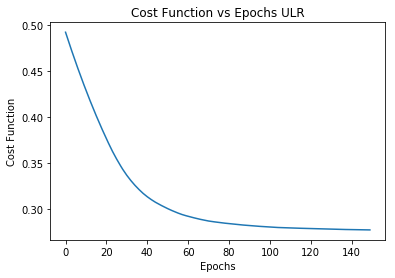

In [9]:
plt.plot(np.arange(0, len(cost_list)), cost_list)
plt.title('Cost Function vs Epochs ULR')
plt.xlabel("Epochs")
plt.ylabel('Cost Function')
plt.show()

In [10]:
accuracy, y_pred1 = validation(X_test, y_test, W_final, b_final)
cm1 = confusion_matrix(y_test, y_pred1)
print(accuracy)
print(cm1)

0.88
[[22  6]
 [ 0 22]]


**Stochastic Gradient Descent**

In [11]:
def forward_prop(X, y, W, b):
    num_data = X.shape[1]
    z = sigmoid(np.dot(W.T, X.T) + b)
    #The defined cost function is for binary cross entropy.
    cost = np.squeeze((np.sum(-(np.array(y))*np.log(z)-(1-np.array(y))*np.log(1-z))))

    dw = (1/num_data)*np.dot(X.T, (z-np.array(y)).T)
    db = (1/num_data)*(np.sum(z-np.array(y)))
    return cost, dw, db

In [12]:
def train_SGD(X_train, y_train, num_iter, lr=0.025):
    W, b, num_data, num_cols = initialize_zeros(X_train)
    
    costs = []

    for i in range(num_iter):
        for j in range(X_train.shape[0]):
            cost, dw, db = forward_prop(X_train[j].reshape(1, X_train.shape[1]), y_train[j], W, b)
            W = W - lr*dw
            b = b - lr*db
        
        costs.append(cost)
        
        # if i%10==9:
            
        #    print("Cost at the end of iteration " + str(i+1) + ": " + str(cost))
        if i==num_iter-1:
            #With weights being close to 1e0, and learning rate being 2.5e-4, setting db threshold to 5e-2
            #lr*dw will cause a change of around 1e-5 i.e. 0.001% which is a decent enough delta in final stages of algorithm.
            if db>0.05:
                print("Didn't converge. Increase lr, num_iter")
    return W, b, costs


In [13]:
W_final, b_final, costs = train_SGD(X_train, y_train, 200)

acc, y_pred2 = validation(X_test, y_test, W_final, b_final)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(acc)

[[24  4]
 [ 1 21]]
0.9


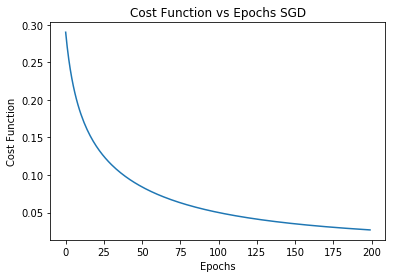

In [14]:
plt.plot(np.arange(0, len(costs)), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Epochs SGD')
plt.show()